# Space Time Analysis
The previous notebooks showed how to grab and clean data from the City of Memphis Data Hub. This notebook will demonstrate how to use the data to conduct space time analysis.

There have been reports of a recent increase in catalytic converter theft. Let's use space time analysis to determine emerging areas of theft.

In [2]:
import arcpy

In [3]:
arcpy.env.workspace = r"C:\Users\ryan.hanson\OneDrive - City of Memphis\GIS\ArcProjects\Police_Incidents_Public_Safety\Police_Incidents_Public_Safety.gdb"
arcpy.env.overwriteOutput = True

In [4]:
# let's select 'Theft of Vehicle Parts/Accessories ' after Jan 1 2020

arcpy.management.SelectLayerByAttribute('all_incidents_local', "NEW_SELECTION" , "agency_crimetype_id = 'Theft of Vehicle Parts/Accessories' And odate > timestamp '2020-01-01 14:42:12'")

<Result 'all_incidents_local_Layer2'>

In [98]:
# 4,769 incidents are found for the type and time period. Let's save those as a new file.
arcpy.FeatureClassToFeatureClass_conversion('all_incidents_local', 
                                            arcpy.env.workspace, 
                                            'Recent_Auto_Part_Theft')

<Result 'C:\\Users\\ryan.hanson\\OneDrive - City of Memphis\\GIS\\ArcProjects\\Police_Incidents_Public_Safety\\Police_Incidents_Public_Safety.gdb\\Recent_Auto_Part_Theft'>

In [99]:
# The data needs to be in a projected coordinate system to do the space time analysis.

prj = arcpy.SpatialReference('NAD 1983 (2011) StatePlane Tennessee FIPS 4100 (US Feet)')
arcpy.management.Project('Recent_Auto_Part_Theft', 'Recent_Auto_Part_Theft_TN_SPF', prj)

<Result 'C:\\Users\\ryan.hanson\\OneDrive - City of Memphis\\GIS\\ArcProjects\\Police_Incidents_Public_Safety\\Police_Incidents_Public_Safety.gdb\\Recent_Auto_Part_Theft_TN_SPF'>

In [100]:
#We must create a space time cube of the thefts.
arcpy.stpm.CreateSpaceTimeCube('Recent_Auto_Part_Theft_TN_SPF', 'AT_Cube.nc', 'odate', '#', '1 Months', 'End_time', '#', '1 Miles', '#', '#', '#', '#')

<Result 'C:\\Users\\ryan.hanson\\OneDrive - City of Memphis\\GIS\\ArcProjects\\Police_Incidents_Public_Safety\\AT_Cube.nc'>

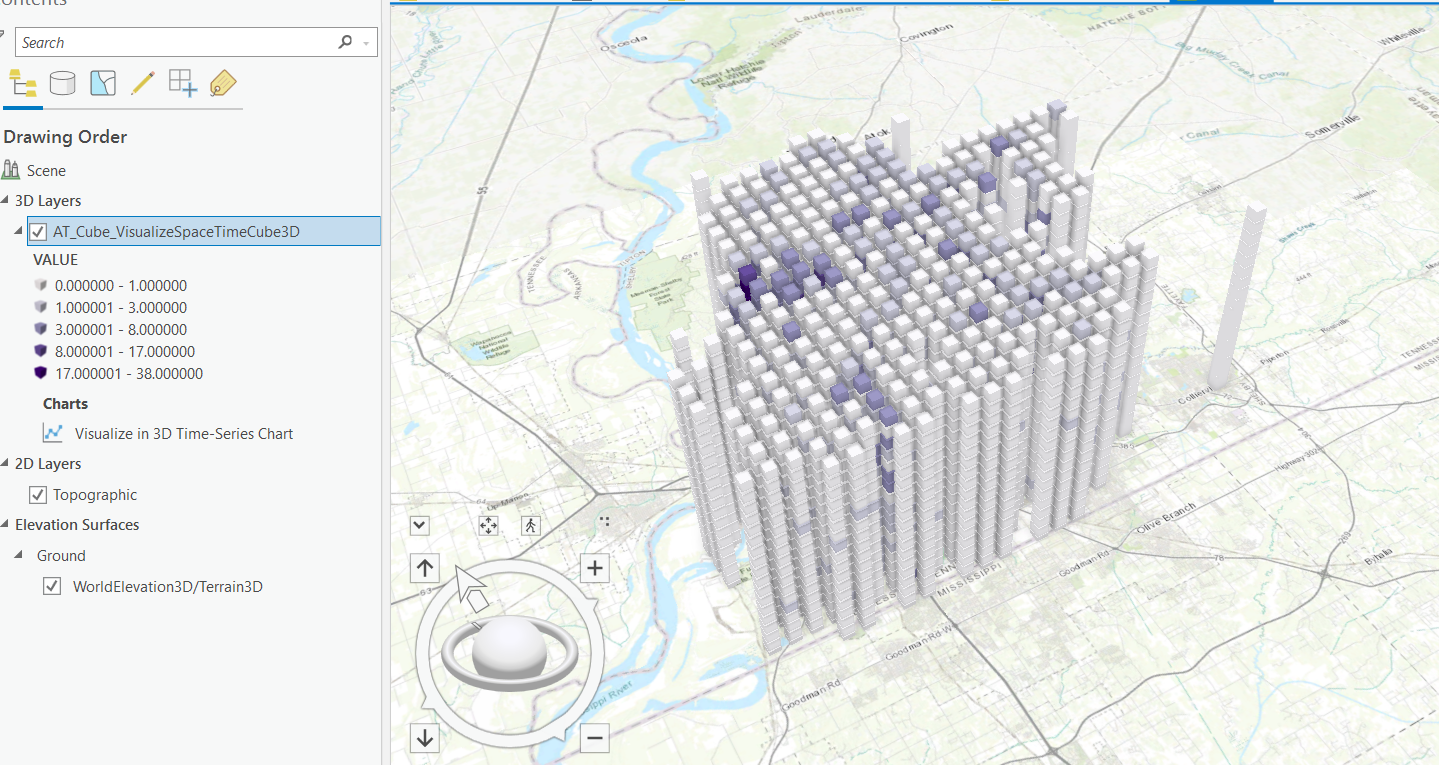

In [101]:
#A space-time cube of the the thefts is created.
#This was created in the GUI just to save time and allow to quickly try different parameters.

from IPython.display import Image
Image('Space_Time_Cube_Auto_Theft.png')

In [102]:
#Now, let's look for emerging hot spots in our space time cube.
#A 1 mile radius and three month period were used as parameters.

arcpy.stpm.EmergingHotSpotAnalysis('AT_Cube.nc', 'COUNT', 'Emerging_Auto_Part_Theft', '1 Miles', 4)

<Result 'C:\\Users\\ryan.hanson\\OneDrive - City of Memphis\\GIS\\ArcProjects\\Police_Incidents_Public_Safety\\Police_Incidents_Public_Safety.gdb\\Emerging_Auto_Part_Theft'>

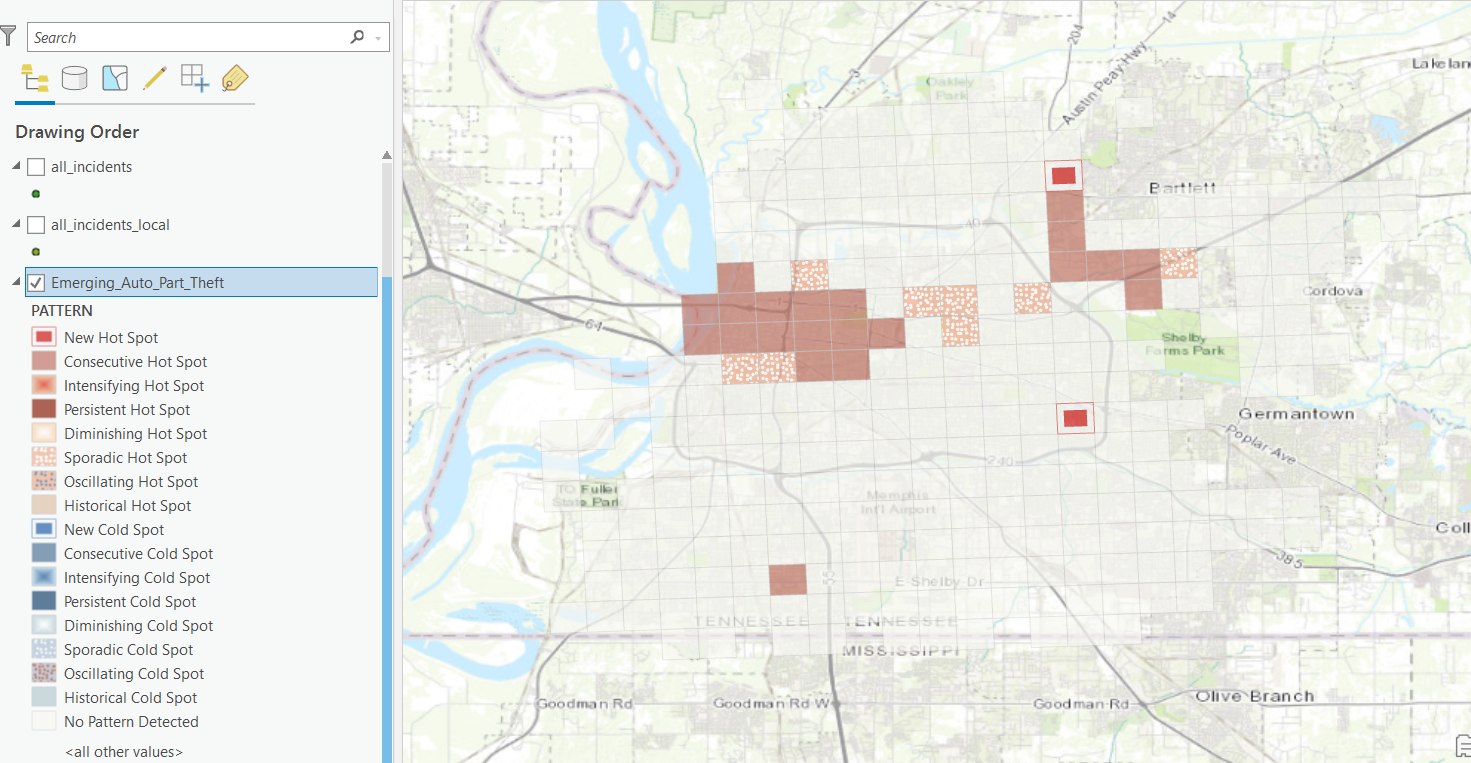

In [106]:
# Here is a screenshot of the 2D output of the analysis
# Two new hot spots were idendtified and areas of persistent and sporatic hot spots.

Image('Auto_Part_Part_Emerging_Hot_Spot.png')

In [109]:
#Let's check the cube for outliers
#All the parameters are the same as the previous analysis for comparison. 

arcpy.stpm.LocalOutlierAnalysis('AT_Cube.nc', 'COUNT', 'Outlier_Auto_Thefit', '1 Miles', 3)

<Result 'C:\\Users\\ryan.hanson\\OneDrive - City of Memphis\\GIS\\ArcProjects\\Police_Incidents_Public_Safety\\Police_Incidents_Public_Safety.gdb\\Outlier_Auto_Thefit'>

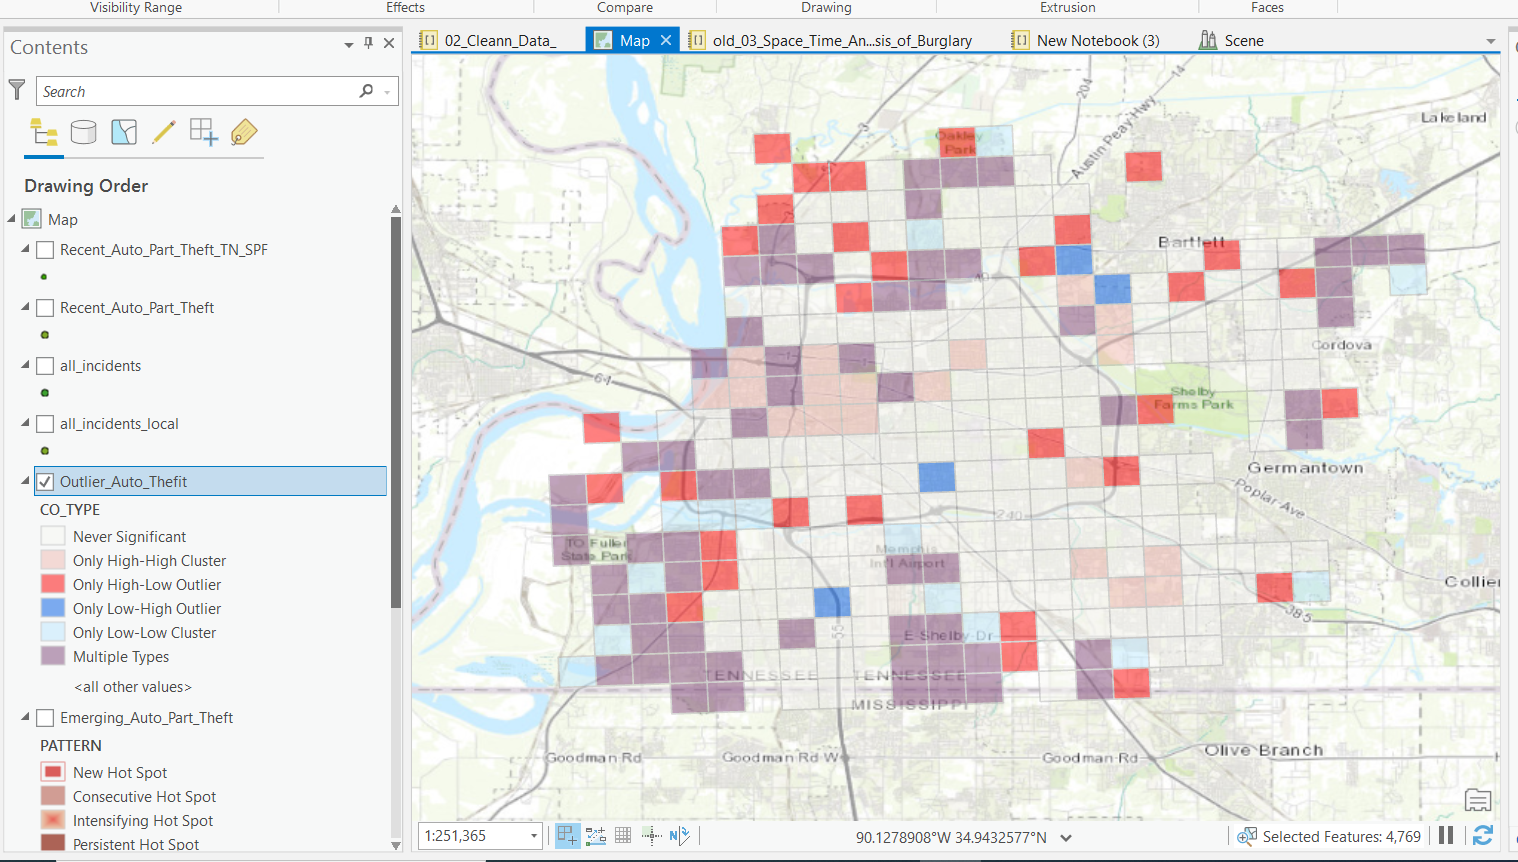

In [107]:
# The outlier analysis gives us additional insight.
# Pay attention to the red areas. These are areas that are high in relation to their nieghbors.
# These could be potentical problem areas in otherwise low incident nieghtborhoods.

Image('Auto_Theft_Outlier.png')

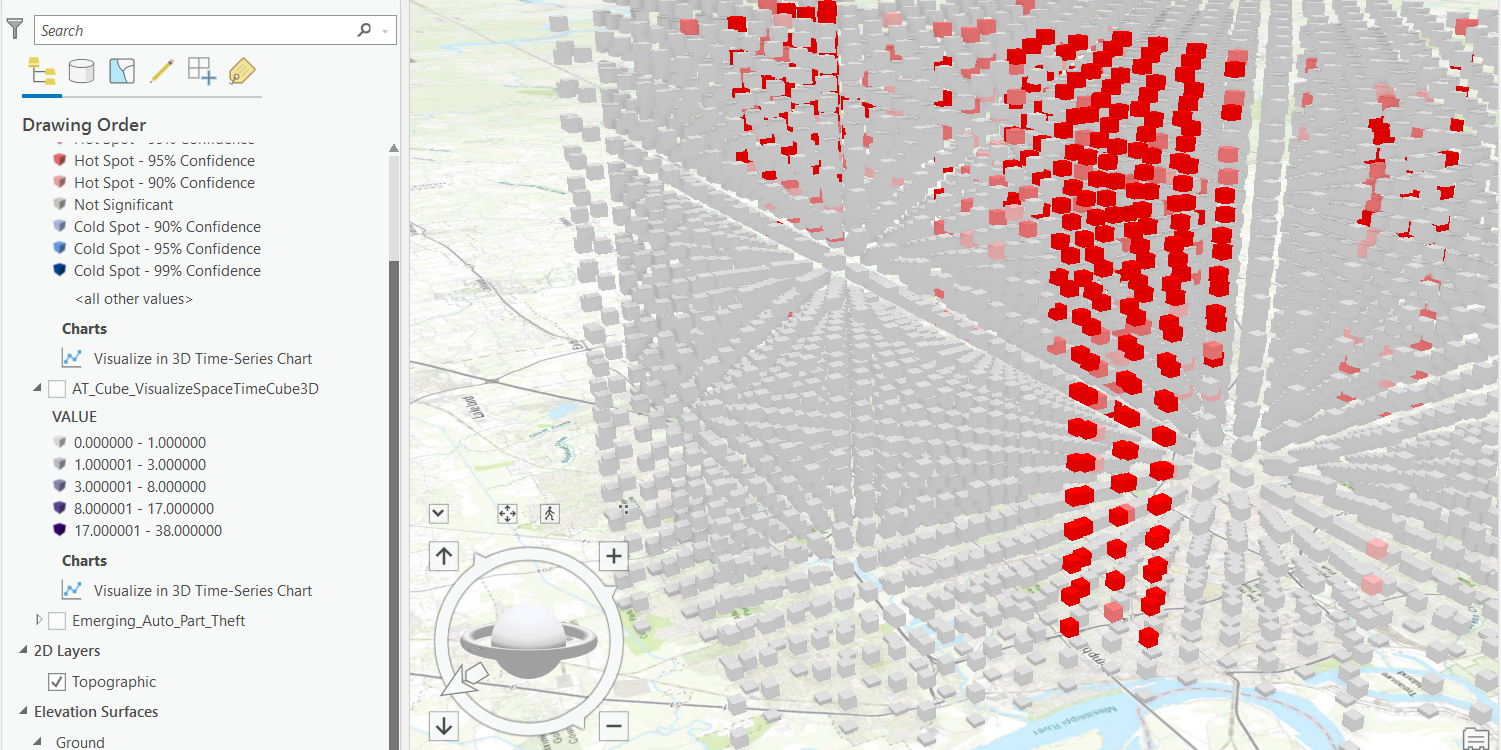

In [111]:
# Both the hot spot and outlier analyses can be view in 3D to determine when trends occured.
# This is best viewed in 3d environment.
# ESRI also has a space time explorer add-in that improves visual exploration.

Image('3d_Hot_Cold.png')